<a href="https://colab.research.google.com/github/HadiRizwan47/Begineer-machine-learning-project/blob/main/ML_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


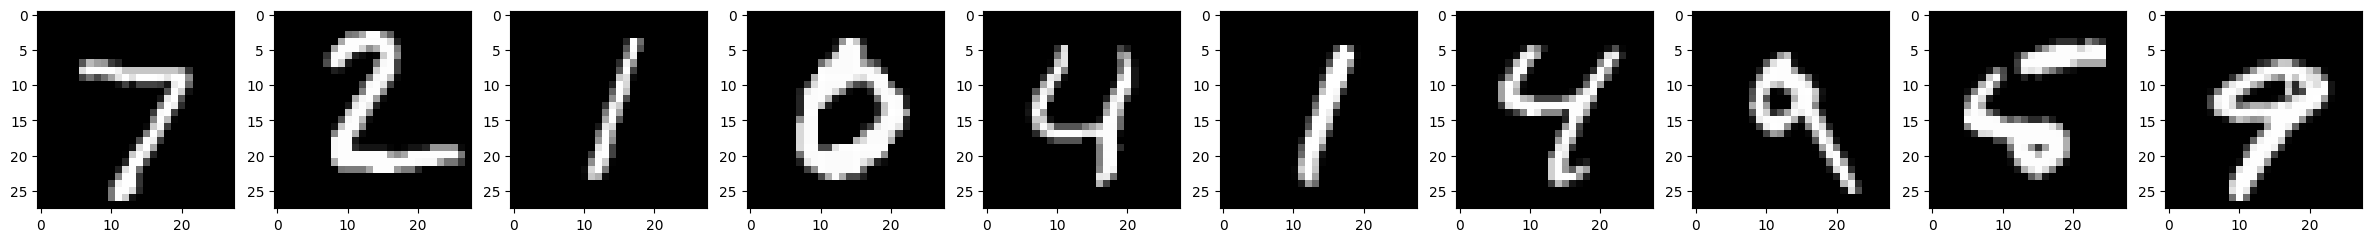

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(30, 20))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
plt.show()
plt.close()

In [ ]:
print('Previous X_train shape: {} \nPrevious Y_train shape: {}'.format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape: (60000,)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
classes = 10
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)
print('New X_train shape: {} \nNew Y_train shape: {}'.format(X_train.shape, Y_train.shape))

New X_train shape: (60000, 784) 
New Y_train shape: (60000, 10)


In [ ]:
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 20
classes = 10
epochs = 5

In [ ]:
model = Sequential()
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='sgd')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           8,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,230 (1.23 MB)

 Trainable params: 322,230 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from time import time
tic = time()
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)
toc = time()
print('Model training took {} seconds'.format(toc -  tic))


Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4231 - loss: 1.9029
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8213 - loss: 0.7832
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8683 - loss: 0.5169
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8870 - loss: 0.4218
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8974 - loss: 0.3749
Model training took 23.127288579940796 seconds


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)
test_accuracy = accuracy_score(y_pred, Y_test)
print('\nTest accuracy: {}'.format(test_accuracy))


Test accuracy: 0.8744


In [ ]:
mask = range(20, 50)
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]
y_pred_probs_valid = model.predict(X_valid)
y_pred_vaild = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


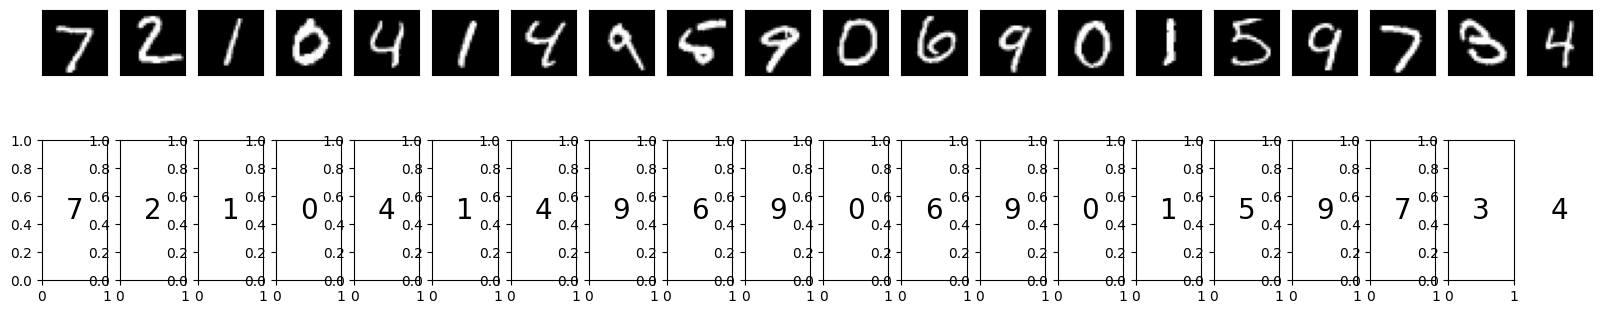

In [ ]:
n = len(X_valid)
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  predicted_digit = np.argmax(y_pred_probs_valid[i])
  ax = plt.subplot(2, n, i + 1 + n)
  plt.text(0.5, 0.5, str(predicted_digit), fontsize=20, ha='center', va='center')
plt.axis('off')
plt.show()
plt.close()

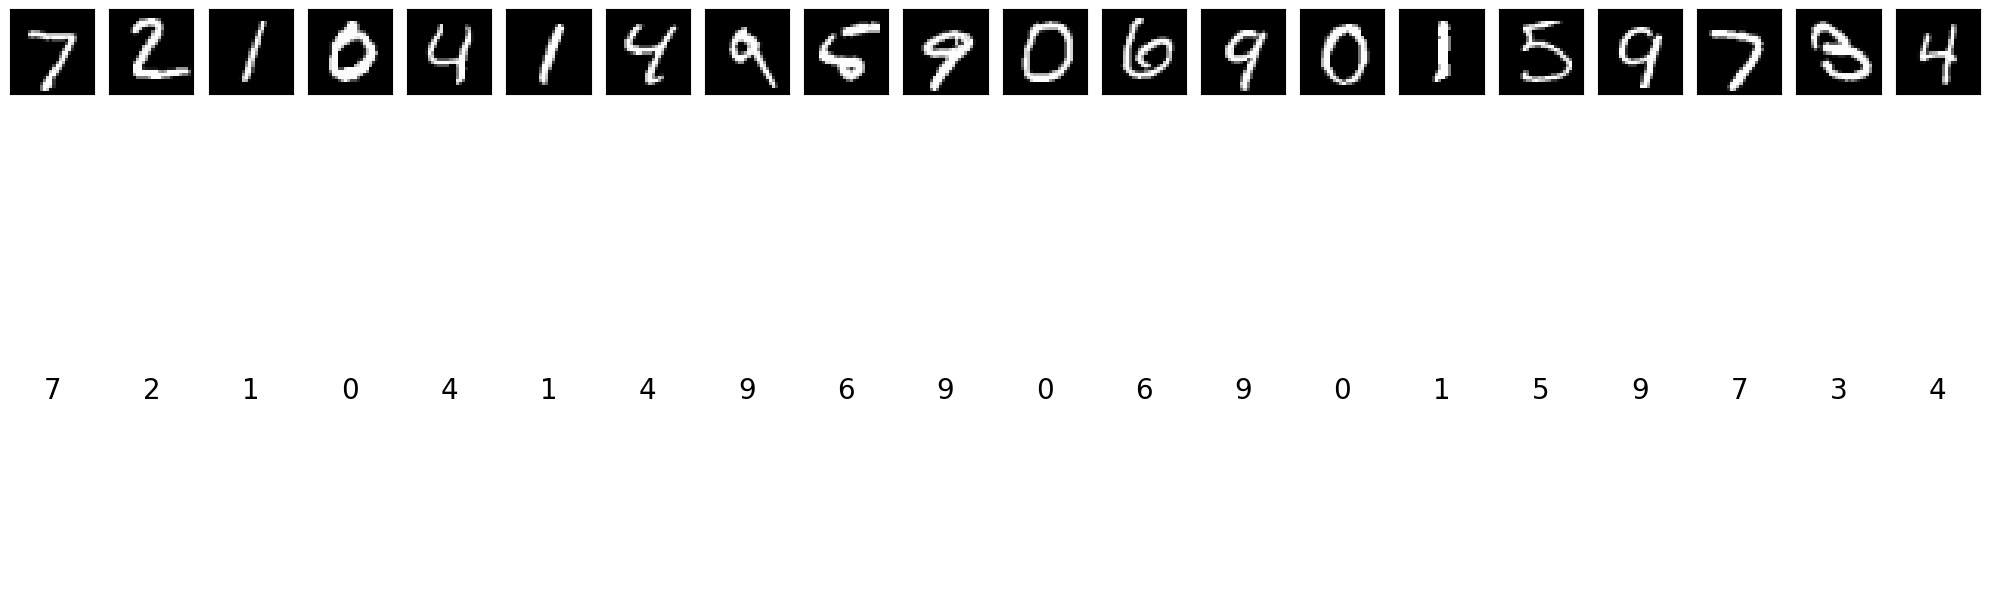

In [ ]:
n = len(X_valid)
plt.figure(figsize=(20, 8))  # Increased height for better layout

for i in range(n):
    # Display the image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28), cmap="gray")  # Reshape image if necessary
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])  # Assumes `y_pred_probs_valid` is the predicted probabilities
    ax = plt.subplot(2, n, i + 1 + n)  # Second row
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=20, ha="center", va="center")
    plt.axis("off")  # Remove axes for clarity

plt.tight_layout()  # Adjust spacing for readability
plt.show()